In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2 
from imgaug import augmenters  
from sklearn.model_selection import train_test_split
import pandas as pd
import random 
import ntpath
from sklearn.utils import shuffle
import matplotlib.image as mpimg

In [2]:
# folder directory
folderDir = 'track/'

# all of the columns that will be picked 
columns = ["left", "right", "center", "steering", "throttle", "reverse", "speed"]

# get the data from driving_log.csv
data = pd.read_csv(os.path.join(folderDir, 'driving_log.csv'), names=columns)

data.head()

,left,right,center,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [3]:
temp = data.to_numpy()
def getImageName(path) :
    _, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(getImageName)
data['left'] = data['left'].apply(getImageName)
data['right'] = data['right'].apply(getImageName)
data

,left,right,center,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
...,...,...,...,...,...,...,...
4048,center_2018_07_16_17_16_31_474.jpg,left_2018_07_16_17_16_31_474.jpg,right_2018_07_16_17_16_31_474.jpg,0.0,0.0,0.0,26.017680
4049,center_2018_07_16_17_16_31_544.jpg,left_2018_07_16_17_16_31_544.jpg,right_2018_07_16_17_16_31_544.jpg,0.0,0.0,0.0,25.808640
4050,center_2018_07_16_17_16_31_617.jpg,left_2018_07_16_17_16_31_617.jpg,right_2018_07_16_17_16_31_617.jpg,0.0,0.0,0.0,25.652960
4051,center_2018_07_16_17_16_31_685.jpg,left_2018_07_16_17_16_31_685.jpg,right_2018_07_16_17_16_31_685.jpg,0.0,0.0,0.0,25.446850


In [4]:
num_bins = 25
# num_bins -> make 25 different range
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [5]:
# add the center zero
center = (bins[1:] + bins[:-1]) * 0.5
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

<BarContainer object of 25 artists>

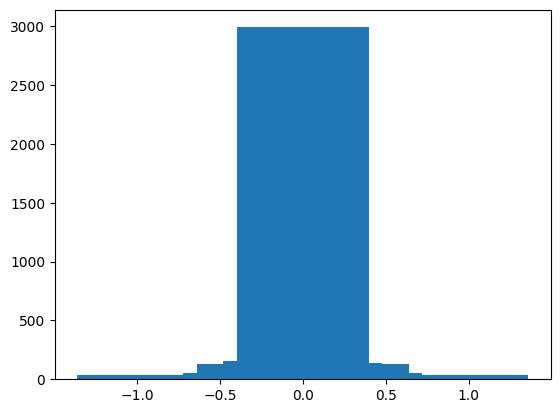

In [6]:
import matplotlib.pyplot as plt
plt.bar(center, hist)

## Make it balance

In [7]:
removed_indexs = []
for i in range(len(center) - 1) :
    indexsBin = []
    for j in range(len(data["steering"])) :
        if data["steering"][j] >= center[i] and data["steering"][j] < center[i+1] :
            indexsBin.append(j)
    indexsBin = shuffle(indexsBin)
    indexsBin = indexsBin[200:]
    removed_indexs.extend(indexsBin)

data.drop(data.index[removed_indexs], inplace=True)



In [8]:
data.shape

(1213, 7)

In [9]:
num_bins = 25
# num_bins -> make 25 different range
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [10]:
center = (bins[1:] + bins[:-1]) * 0.5
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

<BarContainer object of 25 artists>

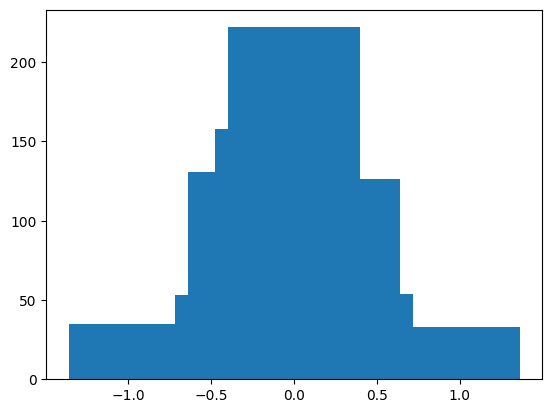

In [11]:
import matplotlib.pyplot as plt
plt.bar(center, hist)

## Split dataset

In [12]:
def load_img_steering(datadir, dt) :
    image_path = []
    steerings = []
    for i in range(len(data)) :
        indexed = dt.iloc[i] # it's same with array[i], but remember data is dataframe
        center, left, right,steering = indexed[0], indexed[1], indexed[2], indexed[3]
        # remember, the center or image name has been truncated before
        # so you need to transform the image name into its directory path
        image_path.append(os.path.join(datadir, center.strip()))
        steerings.append(float(steering))
    image_path = np.asarray(image_path)
    steerings = np.asanyarray(steerings)
    return image_path, steerings

image_paths, steerings = load_img_steering(folderDir + "IMG", data)
# image center -> data (training data)
# steerings -> output (target)
X_train, X_test, y_train, y_test = train_test_split(image_paths, steerings, test_size=0.2)

In [13]:
y_train.shape

(970,)

In [14]:
y_test.shape

(243,)

Text(0.5, 1.0, 'Testing')

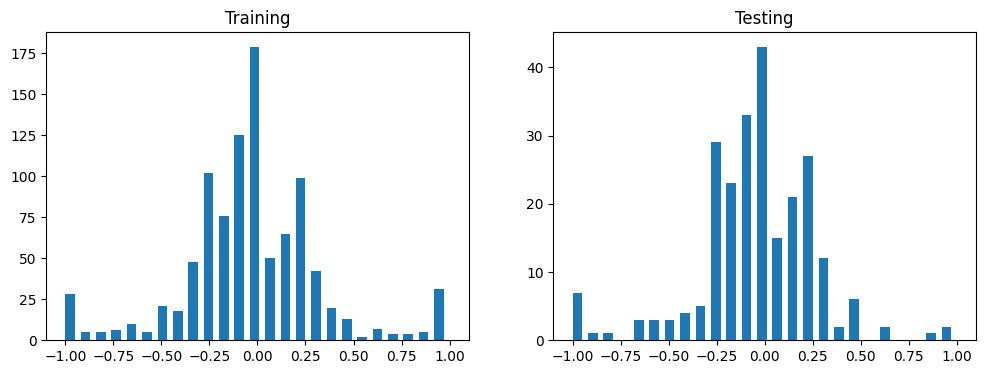

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05)
axes[0].set_title("Training")
axes[1].hist(y_test, bins=num_bins, width=0.05)
axes[1].set_title("Testing")

## Image Augmentation

In [16]:
def zoom(image) :
    zoom = augmenters.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

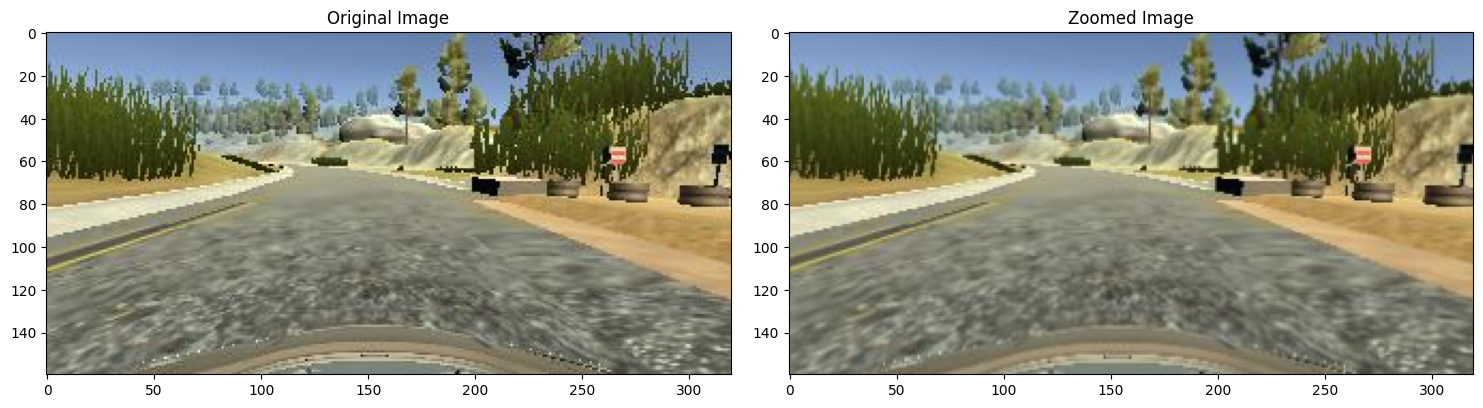

In [17]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(zoomed_image)
axes[1].set_title("Zoomed Image")

In [18]:
def pan(image) : 
    pan = augmenters.Affine(translate_percent={"x":(-0.1, 0.1), "y" : (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

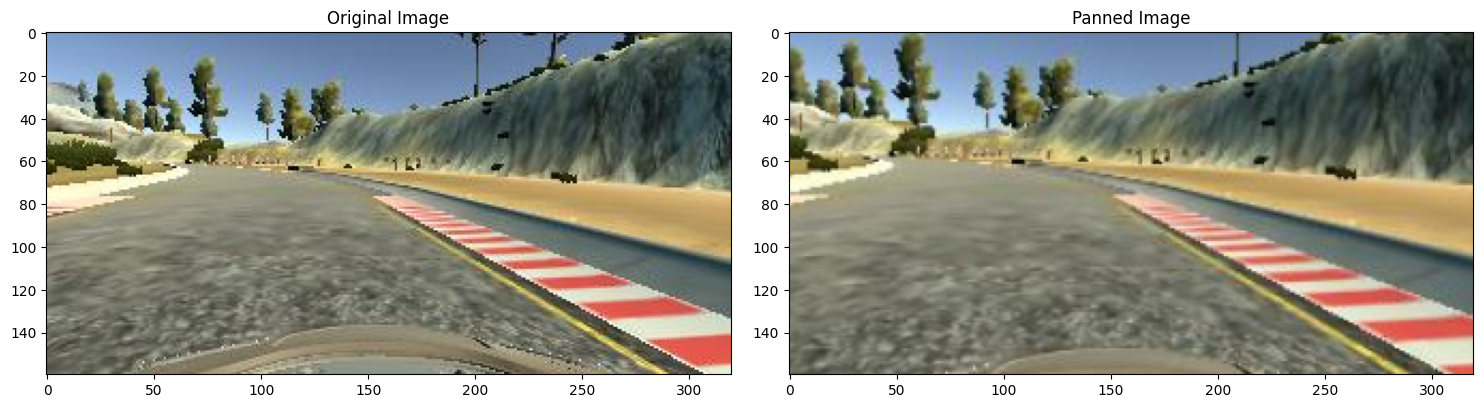

In [19]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(zoomed_image)
axes[1].set_title("Panned Image")

In [20]:
def img_random_brightness(image) :
    brightness = augmenters.Multiply((0.1, 1.2))
    brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Increased Brightness Image')

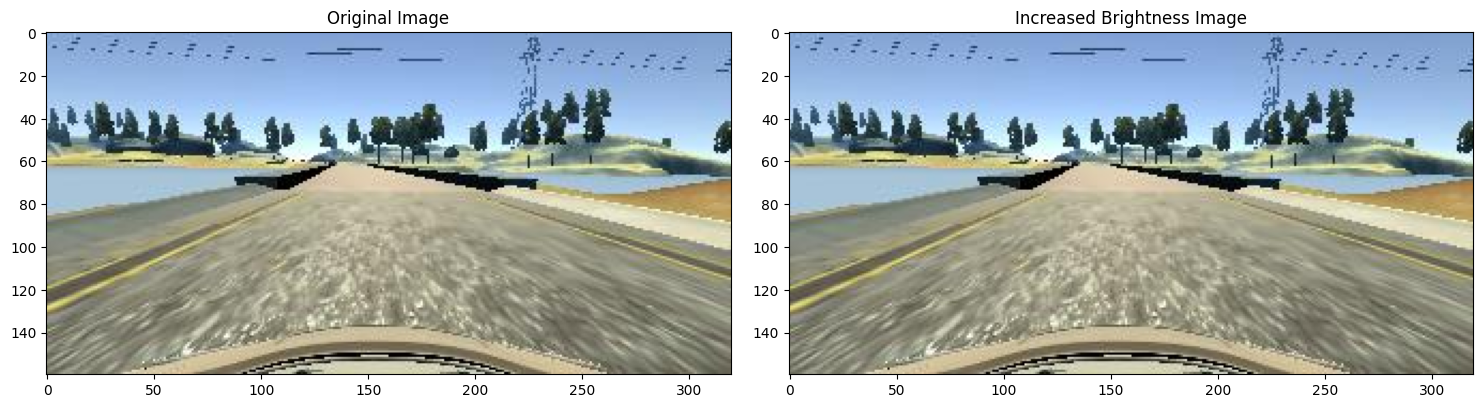

In [21]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = img_random_brightness(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(zoomed_image)
axes[1].set_title("Increased Brightness Image")

In [22]:
def img_random_flip(image, steering_angle) :
    image = cv2.flip(image, 1) # 0 -> vertical, 1 -> horizontal
    return image, -steering_angle

Text(0.5, 1.0, 'Flipped Image')

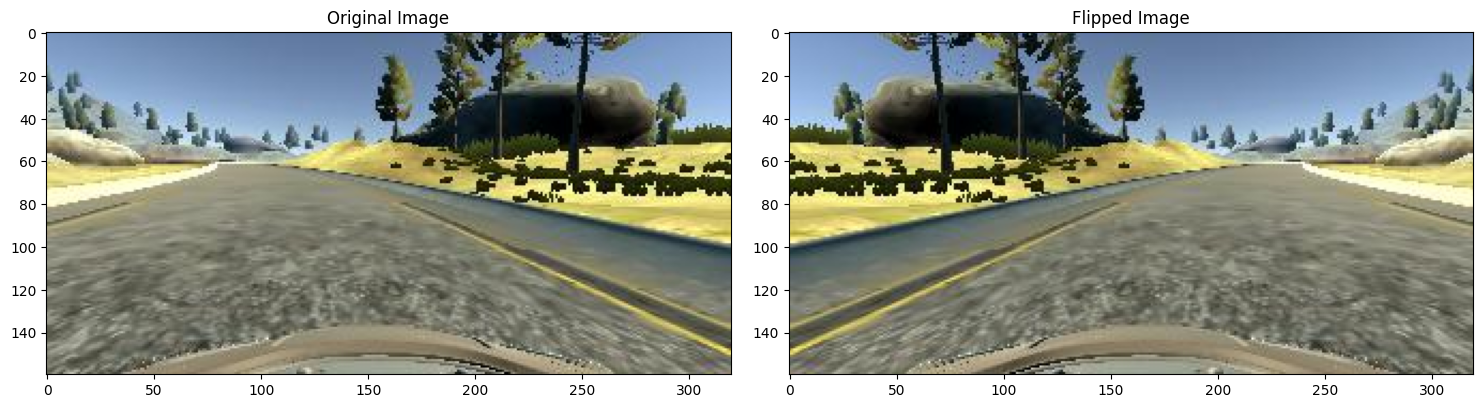

In [23]:
selected_index = random.randint(0, 1000)
image = image_paths[selected_index]
steering_angle = steerings[selected_index]
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(flipped_image)
axes[1].set_title("Flipped Image")

In [24]:
def random_augment(image, steering_angle) :
    image = mpimg.imread(image)

    if np.random.rand() < 0.5 :
        image = zoom(image)
    
    if np.random.rand() < 0.5 :
        image = pan(image)
    
    if np.random.rand() < 0.5 :
        image = img_random_brightness(image)
    
    if np.random.rand() < 0.5 :
        image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

## Preprocess the image

In [25]:
def img_preprocess(img) :
    
    # image -> (height, width, number of channels)
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    # normalization
    img = img/255
    return img


In [26]:
def batch_generator(image_paths, steering_angle, batch_size, isTraining) :
    while True : 
        batch_img = []
        batch_steering = []
        for i in range(batch_size) :
            random_index = random.randint(0, len(image_paths) - 1)

            if isTraining : 
                img, steering = random_augment(image_paths[random_index], steering_angle[random_index])
            else :
                img = mpimg.imread(image_paths[random_index])
                steering = steering_angle[random_index]
            im = img_preprocess(img)
            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [27]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_test_gen, y_test_gen = next(batch_generator(X_test, y_test, 1, 0))

Text(0.5, 1.0, 'Transformed image')

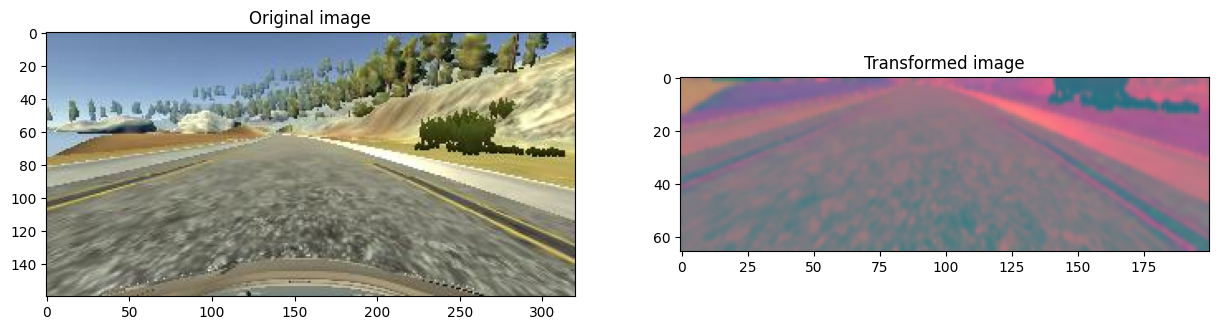

In [29]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(original_image)
axes[0].set_title("Original image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Transformed image")

In [32]:
X_train

array(['track/IMG\\center_2018_07_16_17_12_07_557.jpg',
       'track/IMG\\center_2018_07_16_17_15_09_393.jpg',
       'track/IMG\\center_2018_07_16_17_13_28_505.jpg',
       'track/IMG\\center_2018_07_16_17_13_09_429.jpg',
       'track/IMG\\center_2018_07_16_17_13_33_101.jpg',
       'track/IMG\\center_2018_07_16_17_12_34_721.jpg',
       'track/IMG\\center_2018_07_16_17_13_16_927.jpg',
       'track/IMG\\center_2018_07_16_17_14_14_501.jpg',
       'track/IMG\\center_2018_07_16_17_14_42_275.jpg',
       'track/IMG\\center_2018_07_16_17_15_38_149.jpg',
       'track/IMG\\center_2018_07_16_17_12_53_772.jpg',
       'track/IMG\\center_2018_07_16_17_11_49_708.jpg',
       'track/IMG\\center_2018_07_16_17_15_05_857.jpg',
       'track/IMG\\center_2018_07_16_17_13_01_793.jpg',
       'track/IMG\\center_2018_07_16_17_16_26_430.jpg',
       'track/IMG\\center_2018_07_16_17_14_59_125.jpg',
       'track/IMG\\center_2018_07_16_17_12_13_034.jpg',
       'track/IMG\\center_2018_07_16_17_11_55_92

In [31]:
# X_train = np.array(list(map(img_preprocess, X_train)))
# X_test = np.array(list(map(img_preprocess, X_test)))

TypeError: string indices must be integers

TypeError: Image data of dtype <U44 cannot be converted to float

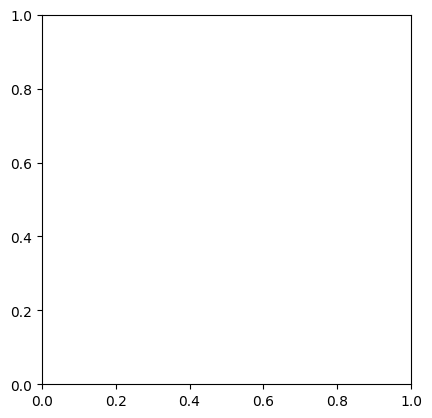

In [33]:
plt.imshow(X_train[3])

## Using NVIDIA Model

In [38]:
def nvidia_model() :
    model = Sequential()
    # strides = (x,y). It moves x pixels horizontaly and y pixels vertically
    model.add(Conv2D(24, (5, 5), strides=(2,2), input_shape=(66, 200, 3), activation="elu"))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation="elu"))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation="elu"))
    model.add(Conv2D(64, (3, 3), activation="elu"))
    model.add(Conv2D(64, (3, 3), activation="elu"))
    model.add(Flatten())
    model.add(Dense(100, activation="elu"))
    model.add(Dense(50, activation="elu"))
  
    model.add(Dense(10, activation="elu"))
    
    model.add(Dense(1))

    model.compile(loss="mse", optimizer=Adam(lr=0.01))
    return model


m = nvidia_model()
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [39]:
history = m.fit_generator(batch_generator(X_train, y_train, 100, 1), steps_per_epoch=300, epochs=10, validation_data=batch_generator(X_test, y_test, 100, 1), validation_steps=200, verbose=1)

C:\Users\boby\AppData\Local\Temp\ipykernel_17768\3345848191.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = m.fit_generator(batch_generator(X_train, y_train, 100, 1), steps_per_epoch=300, epochs=10, validation_data=batch_generator(X_test, y_test, 100, 1), validation_steps=200, verbose=1)


Epoch 1/10
300/300 [==============================] - 165s 547ms/step - loss: 0.1585 - val_loss: 0.0537
Epoch 2/10
300/300 [==============================] - 169s 564ms/step - loss: 0.0635 - val_loss: 0.0450
Epoch 3/10
300/300 [==============================] - 164s 550ms/step - loss: 0.0491 - val_loss: 0.0399
Epoch 4/10
300/300 [==============================] - 161s 539ms/step - loss: 0.0397 - val_loss: 0.0352
Epoch 5/10
300/300 [==============================] - 163s 543ms/step - loss: 0.0354 - val_loss: 0.0328
Epoch 6/10
300/300 [==============================] - 165s 550ms/step - loss: 0.0328 - val_loss: 0.0327
Epoch 7/10
300/300 [==============================] - 160s 536ms/step - loss: 0.0313 - val_loss: 0.0326
Epoch 8/10
300/300 [==============================] - 154s 515ms/step - loss: 0.0291 - val_loss: 0.0335
Epoch 9/10
300/300 [==============================] - 138s 460ms/step - loss: 0.0284 - val_loss: 0.0323
Epoch 10/10
300/300 [==============================] - 138s 461m

Text(0.5, 0, 'Epoch')

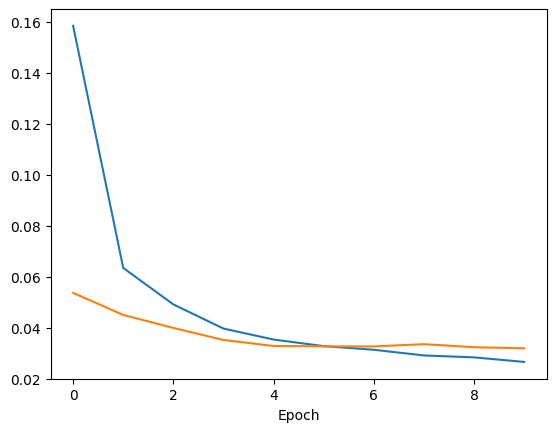

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")

In [42]:
m.save("self_driving_car_newest_1.h5")

## Image Augmentation

In [ ]:
def zoom(image) :
    zoom = augmenters.Affline(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

In [ ]:
image = image_paths[0]